<a href="https://colab.research.google.com/github/Rohith18744/Chicago-crime-rate-using-prophet/blob/main/Chicago_crime_rate_using_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [8]:

chicago_df_1=pd.read_csv('Chicago_Crimes_2005_to_2007.csv')
chicago_df_2=pd.read_csv('Chicago_Crimes_2008_to_2011.csv')
chicago_df_3=pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

<ipython-input-8-c27ca0381067>:1: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_1=pd.read_csv('Chicago_Crimes_2005_to_2007.csv')
<ipython-input-8-c27ca0381067>:2: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago_df_2=pd.read_csv('Chicago_Crimes_2008_to_2011.csv')


In [9]:
chicago_df_1

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006.0,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006.0,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006.0,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006.0,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006.0,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108837,109683,4841251,HM454800,07/04/2006 06:20:00 PM,105XX S AVENUE H,1310,CRIMINAL DAMAGE,TO PROPERTY,ALLEY,False,...,10.0,52.0,14,1202833.0,1835781.0,2006.0,04/15/2016 08:55:02 AM,41.704099,-87.532866,"(41.704098565, -87.532866497)"
108838,109684,4841252,HM454605,07/04/2006 06:35:24 PM,085XX S EUCLID AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,True,...,8.0,45.0,08B,1190671.0,1848748.0,2006.0,04/15/2016 08:55:02 AM,41.739983,-87.576984,"(41.73998292, -87.576983607)"
108839,109685,4841253,HM446554,06/17/2006 06:00:00 PM,071XX S CALIFORNIA AVE,0820,THEFT,$500 AND UNDER,PARK PROPERTY,False,...,18.0,66.0,06,1158938.0,1857273.0,2006.0,04/15/2016 08:55:02 AM,41.764083,-87.693017,"(41.764083357, -87.693016796)"
108840,109686,4841254,HM453432,07/04/2006 02:13:00 AM,007XX N WELLS ST,0326,ROBBERY,AGGRAVATED VEHICULAR HIJACKING,GAS STATION,False,...,42.0,8.0,03,1174597.0,1905472.0,2006.0,04/15/2016 08:55:02 AM,41.896011,-87.634185,"(41.896011332, -87.634185138)"


In [10]:
chicago_df=pd.concat([chicago_df_1,chicago_df_2,chicago_df_3])

In [11]:
chicago_df_1.shape

(108842, 23)

In [12]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
113821,2446452,8484441,HV161149,02/16/2012 09:15:00 PM,004XX N AVERS AVE,2024,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,...,27.0,23.0,18,1150644.0,1902738.0,2012.0,02/04/2016 06:33:39 AM,41.889011,-87.722231,"(41.889010876, -87.722231307)"
113822,2446453,8484442,HV160944,02/16/2012 07:17:00 PM,004XX N DEARBORN ST,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,RESTAURANT,True,...,42.0,8.0,08B,1175859.0,1903386.0,2012.0,02/04/2016 06:33:39 AM,41.890259,-87.629613,"(41.890258925, -87.629612961)"
113823,2446454,8484443,HV160964,02/16/2012 04:10:00 PM,013XX N CLEVELAND AVE,0460,BATTERY,SIMPLE,STREET,False,...,27.0,8.0,08B,1172739.0,1909459.0,2012.0,02/04/2016 06:33:39 AM,41.906993,-87.640891,"(41.906993222, -87.640890929)"
113824,2446455,8484444,HV161128,02/16/2012 09:30:00 PM,043XX W DIVISION ST,1121,DECEPTIVE PRACTICE,COUNTERFEITING DOCUMENT,STREET,True,...,37.0,23.0,10,1147324.0,1907647.0,2012.0,02/04/2016 06:33:39 AM,41.902546,-87.734298,"(41.902545936, -87.734297887)"
113825,2446456,8484445,HV160845,02/16/2012 05:50:00 PM,010XX W NORTH AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,...,32.0,8.0,08B,1169292.0,1910831.0,2012.0,02/04/2016 06:33:39 AM,41.910834,-87.653513,"(41.910833728, -87.653513184)"
113826,2446457,8484446,HV161100,02/16/2012 07:21:00 PM,065XX S DR MARTIN LUTHER KING JR DR,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,20.0,69.0,08B,1180044.0,1861789.0,2012.0,02/04/2016 06:33:39 AM,41.776019,-87.615520,"(41.776018543, -87.615520426)"
113827,2446458,8484447,HV161189,02/16/2012 10:45:00 PM,066XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,20.0,42.0,14,1180389.0,1861084.0,2012.0,02/04/2016 06:33:39 AM,41.774076,-87.614277,"(41.774076044, -87.614277305)"
113828,2446459,8484448,HV161106,02/16/2012 08:40:00 PM,014XX E 72ND PL,0560,ASSAULT,SIMPLE,RESIDENCE PORCH/HALLWAY,False,...,5.0,43.0,08A,1187097.0,1857211.0,2012.0,02/04/2016 06:33:39 AM,41.763292,-87.589810,"(41.763291654, -87.589810116)"
113829,2446460,8484449,HV153184,02/10/2012 03:50:00 PM,002XX S WABASH AVE,0870,THEFT,POCKET-PICKING,CTA PLATFORM,False,...,42.0,32.0,06,1176845.0,1899365.0,2012.0,02/04/2016 06:33:39 AM,41.879203,-87.626114,"(41.879202837, -87.626113652)"
113830,2446461,8484450,HV161161,02/16/2012 09:00:00 PM,061XX S RHODES AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,...,20.0,42.0,08A,1180956.0,1864460.0,2012.0,NaN,NaN,NaN,NaN


<Axes: >

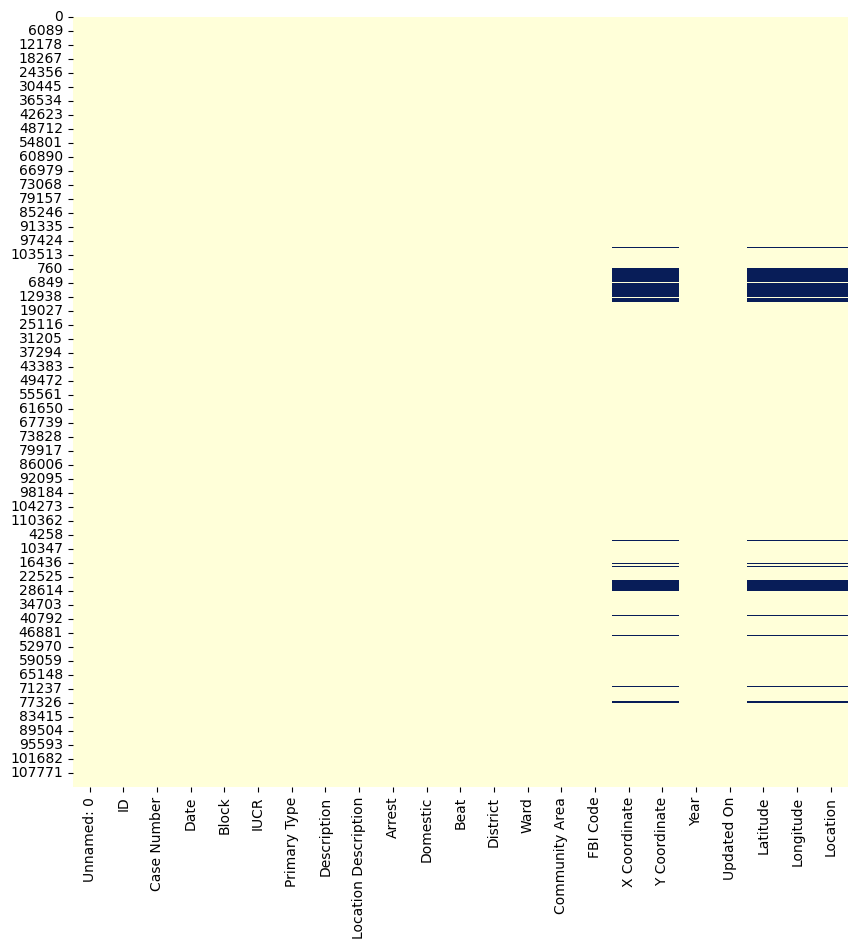

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(),cbar=False,cmap='YlGnBu')

In [16]:
chicago_df.drop(['Unnamed: 0','Case Number','ID','IUCR','X Coordinate','Y Coordinate','Updated On','Year','FBI Code','Beat','Ward','Community Area','Location','Latitude','Longitude','District'],inplace=True,axis=1)

In [17]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,01/08/2006 11:16:00 PM,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
113826,02/16/2012 07:21:00 PM,065XX S DR MARTIN LUTHER KING JR DR,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False
113827,02/16/2012 10:45:00 PM,066XX S VERNON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True
113828,02/16/2012 08:40:00 PM,014XX E 72ND PL,ASSAULT,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True
113829,02/10/2012 03:50:00 PM,002XX S WABASH AVE,THEFT,POCKET-PICKING,CTA PLATFORM,False,False


In [18]:
chicago_df.Date=pd.to_datetime(chicago_df.Date,format='%m/%d/%Y %I:%M:%S %p')

In [34]:
chicago_df.index=pd.DatetimeIndex(chicago_df.Date)

In [36]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2006-04-02 13:00:00,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...
2012-02-16 19:21:00,2012-02-16 19:21:00,065XX S DR MARTIN LUTHER KING JR DR,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False
2012-02-16 22:45:00,2012-02-16 22:45:00,066XX S VERNON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True
2012-02-16 20:40:00,2012-02-16 20:40:00,014XX E 72ND PL,ASSAULT,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True


In [21]:
chicago_df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,66888
BATTERY,61943
CRIMINAL DAMAGE,38612
NARCOTICS,38030
OTHER OFFENSE,21817
ASSAULT,20627
BURGLARY,17649
MOTOR VEHICLE THEFT,15412
DECEPTIVE PRACTICE,14136


In [23]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'DECEPTIVE PRACTICE',
       'ROBBERY', 'CRIMINAL TRESPASS', 'PROSTITUTION', 'WEAPONS VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION'],
      dtype='object', name='Primary Type')

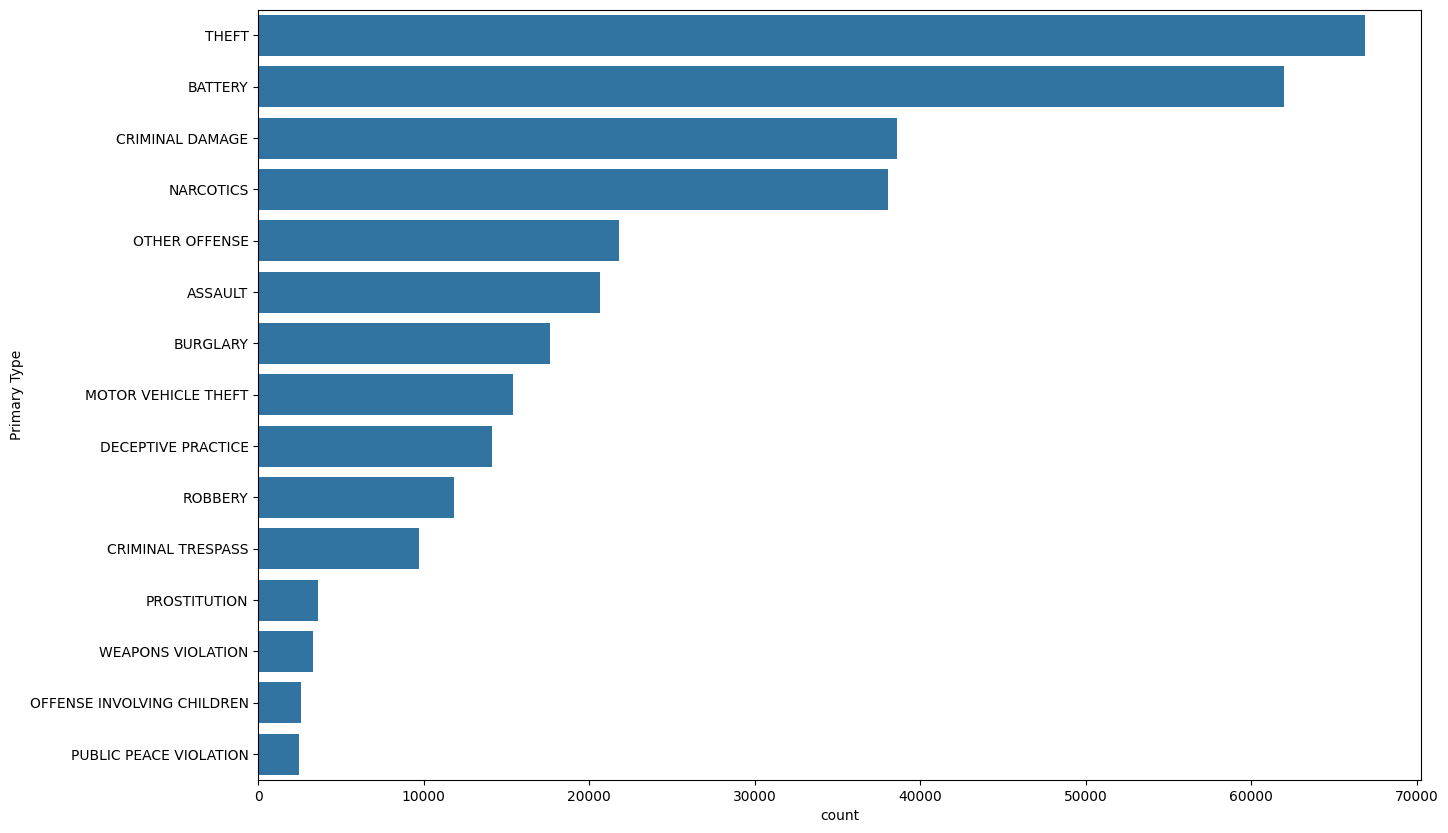

In [31]:
plt.figure(figsize=(15, 10))
order_data = chicago_df['Primary Type'].value_counts().iloc[:15]
filtered_df = chicago_df[chicago_df['Primary Type'].isin(order_data.index)]
sns.countplot(y='Primary Type', data=filtered_df, order=order_data.index)
plt.show()


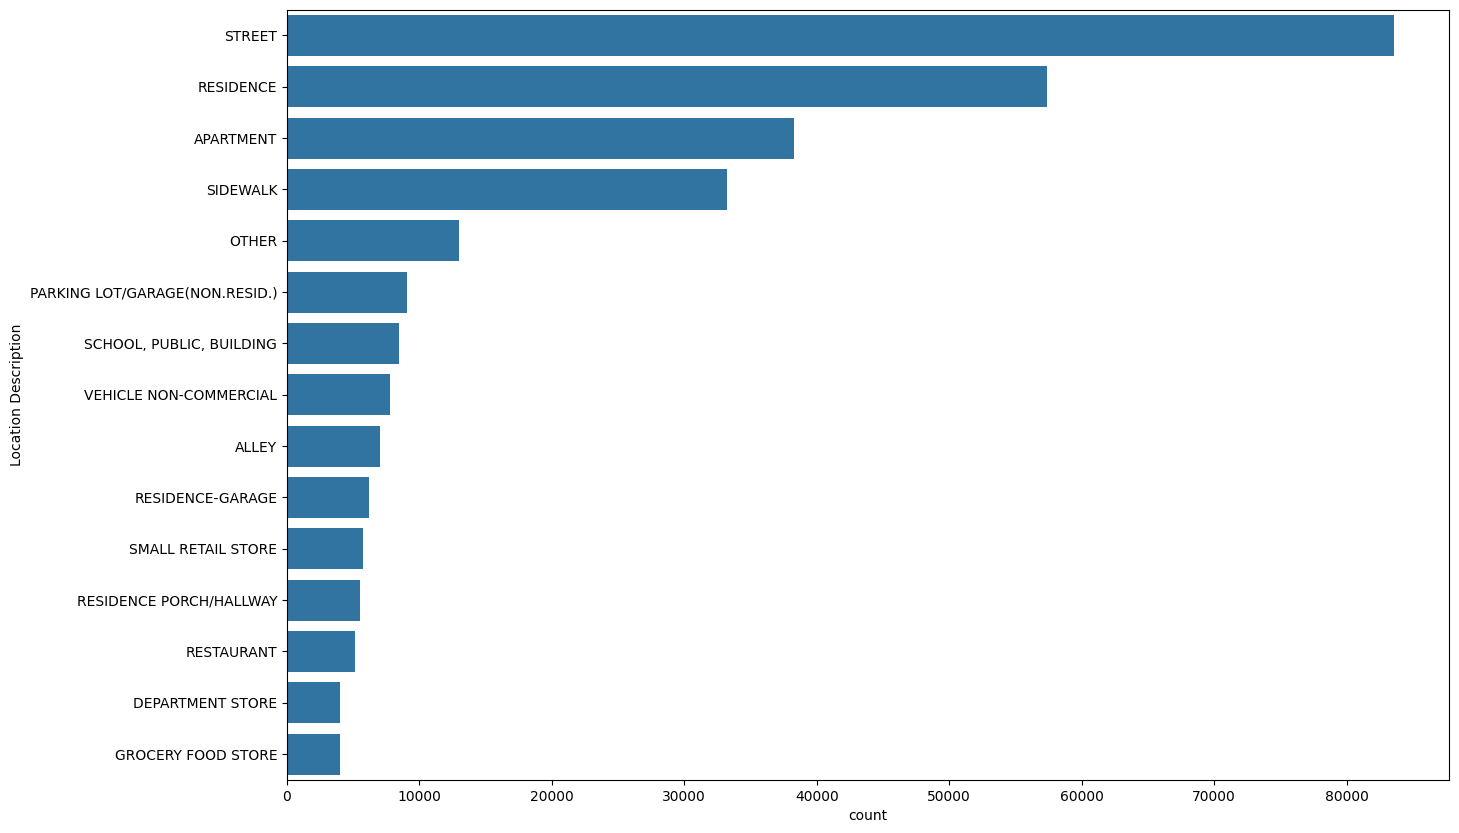

In [33]:
plt.figure(figsize=(15, 10))
top_locations = chicago_df['Location Description'].value_counts().iloc[:15].index
filtered_df = chicago_df[chicago_df['Location Description'].isin(top_locations)]
sns.countplot(y='Location Description', data=filtered_df, order=top_locations)
plt.show()

In [37]:
chicago_df.resample('Y').size()

<ipython-input-37-45ca8699d18e>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  chicago_df.resample('Y').size()


,0
Date,
2005-12-31,1310
2006-12-31,107532
2007-12-31,0
2008-12-31,103943
2009-12-31,6222
2010-12-31,1493
2011-12-31,535
2012-12-31,37240
2013-12-31,1946


<ipython-input-38-546458ecd36c>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_df.resample('Y').size())


Text(0, 0.5, 'Number of Crimes')

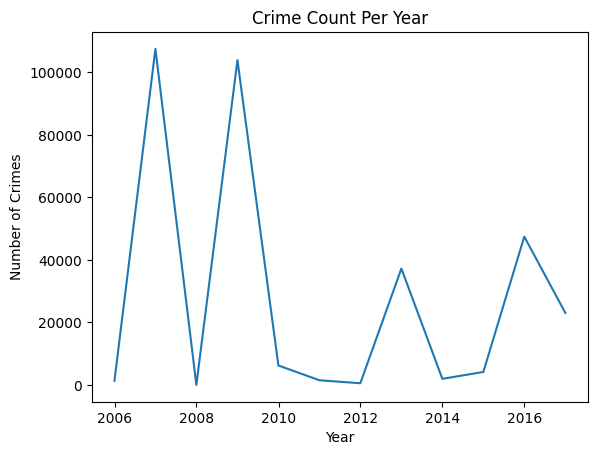

In [38]:
plt.plot(chicago_df.resample('Y').size())
plt.title("Crime Count Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")

In [39]:
chicago_df.resample('M').size()


<ipython-input-39-cd7733d5f406>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_df.resample('M').size()


,0
Date,
2005-01-31,64
2005-02-28,34
2005-03-31,40
2005-04-30,68
2005-05-31,71
...,...
2016-01-31,809
2016-02-29,123
2016-03-31,213


<ipython-input-40-63915dd23140>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(chicago_df.resample('M').size())


Text(0, 0.5, 'Number of Crimes')

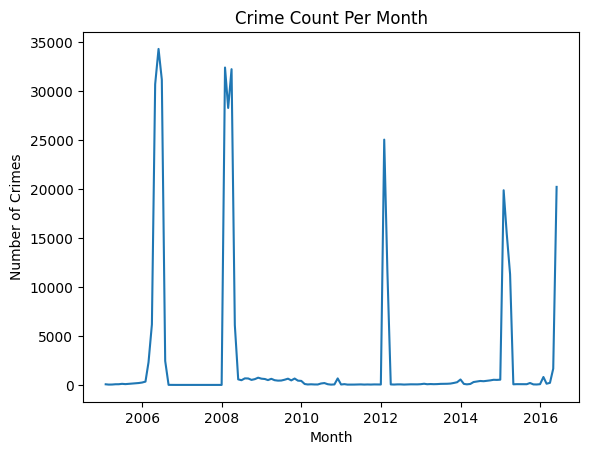

In [40]:
plt.plot(chicago_df.resample('M').size())
plt.title("Crime Count Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")

<ipython-input-41-e7d05890b097>:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(chicago_df.resample('Q').size())


Text(0, 0.5, 'Number of Crimes')

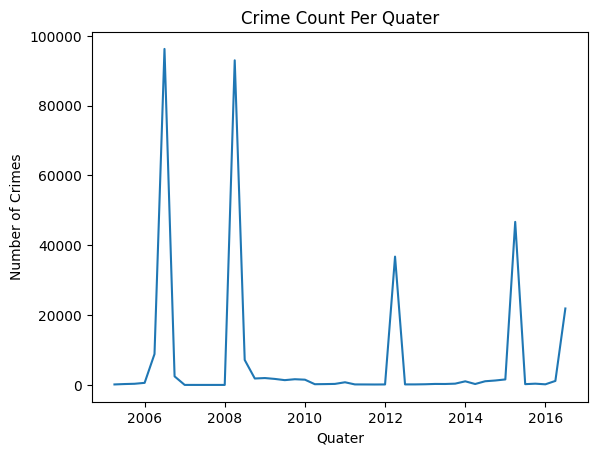

In [41]:
plt.plot(chicago_df.resample('Q').size())
plt.title("Crime Count Per Quater")
plt.xlabel("Quater")
plt.ylabel("Number of Crimes")

In [42]:
chicago_Prophet=chicago_df.resample('M').size().reset_index()



<ipython-input-42-a1b2738ef2d6>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_Prophet=chicago_df.resample('M').size().reset_index()


In [43]:
chicago_Prophet

,Date,0
0,2005-01-31,64
1,2005-02-28,34
2,2005-03-31,40
3,2005-04-30,68
4,2005-05-31,71
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [44]:
chicago_Prophet.columns=['Date','Crime Count']

In [45]:
chicago_Prophet

,Date,Crime Count
0,2005-01-31,64
1,2005-02-28,34
2,2005-03-31,40
3,2005-04-30,68
4,2005-05-31,71
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [46]:
chicago_Prophet_final=chicago_Prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [47]:
chicago_Prophet_final

,ds,y
0,2005-01-31,64
1,2005-02-28,34
2,2005-03-31,40
3,2005-04-30,68
4,2005-05-31,71
...,...,...
132,2016-01-31,809
133,2016-02-29,123
134,2016-03-31,213
135,2016-04-30,1663


In [49]:
m=Prophet()
m.fit(chicago_Prophet_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfo_9pbk/07agn66k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsfo_9pbk/2x0c3fi1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51307', 'data', 'file=/tmp/tmpsfo_9pbk/07agn66k.json', 'init=/tmp/tmpsfo_9pbk/2x0c3fi1.json', 'output', 'file=/tmp/tmpsfo_9pbk/prophet_model_x3n5vr2/prophet_model-20250105124316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

In [52]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,4024.792152,-1639.249277,16137.428561,4024.792152,4024.792152,3059.688375,3059.688375,3059.688375,3059.688375,3059.688375,3059.688375,0.0,0.0,0.0,7084.480527
1,2005-02-28,4005.660409,-1697.946731,15429.513090,4005.660409,4005.660409,2458.504936,2458.504936,2458.504936,2458.504936,2458.504936,2458.504936,0.0,0.0,0.0,6464.165345
2,2005-03-31,3984.478837,-2687.632658,14964.359192,3984.478837,3984.478837,1662.854995,1662.854995,1662.854995,1662.854995,1662.854995,1662.854995,0.0,0.0,0.0,5647.333832
3,2005-04-30,3963.980541,-3828.468662,13503.155573,3963.980541,3963.980541,567.268324,567.268324,567.268324,567.268324,567.268324,567.268324,0.0,0.0,0.0,4531.248864
4,2005-05-31,3942.798968,-2508.254358,14982.024123,3942.798968,3942.798968,2073.281507,2073.281507,2073.281507,2073.281507,2073.281507,2073.281507,0.0,0.0,0.0,6016.080475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2017-05-27,950.798758,-5822.599087,11985.962599,950.798149,950.799352,2189.652343,2189.652343,2189.652343,2189.652343,2189.652343,2189.652343,0.0,0.0,0.0,3140.451100
498,2017-05-28,950.115508,-6065.497608,12028.630173,950.114898,950.116106,2137.230216,2137.230216,2137.230216,2137.230216,2137.230216,2137.230216,0.0,0.0,0.0,3087.345724
499,2017-05-29,949.432259,-5416.601327,12137.743623,949.431646,949.432859,2096.138498,2096.138498,2096.138498,2096.138498,2096.138498,2096.138498,0.0,0.0,0.0,3045.570757
500,2017-05-30,948.749010,-5470.925375,11883.270713,948.748395,948.749613,2072.915755,2072.915755,2072.915755,2072.915755,2072.915755,2072.915755,0.0,0.0,0.0,3021.664765


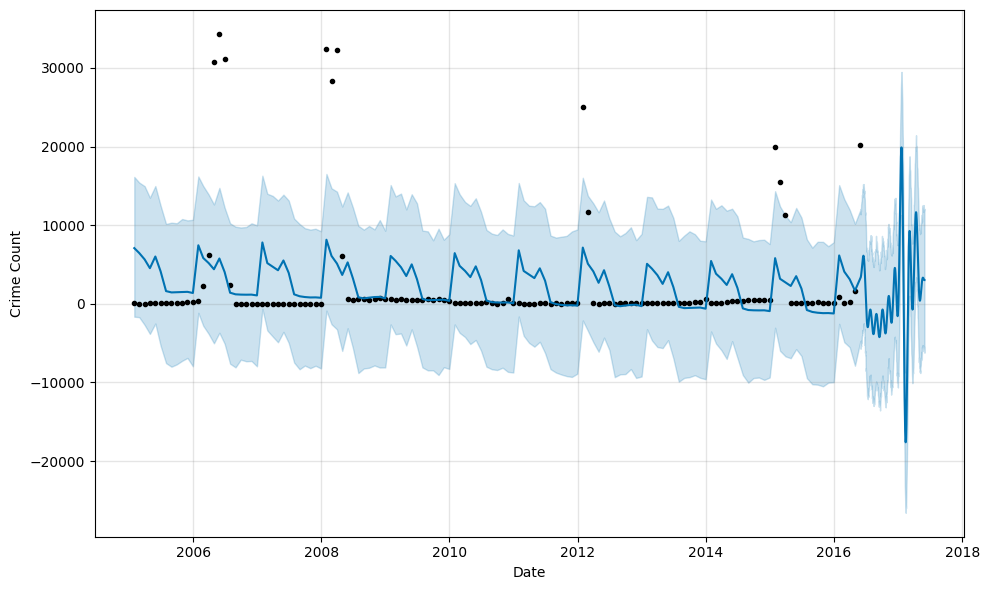

In [53]:
figure=m.plot(forecast,xlabel='Date',ylabel='Crime Count')

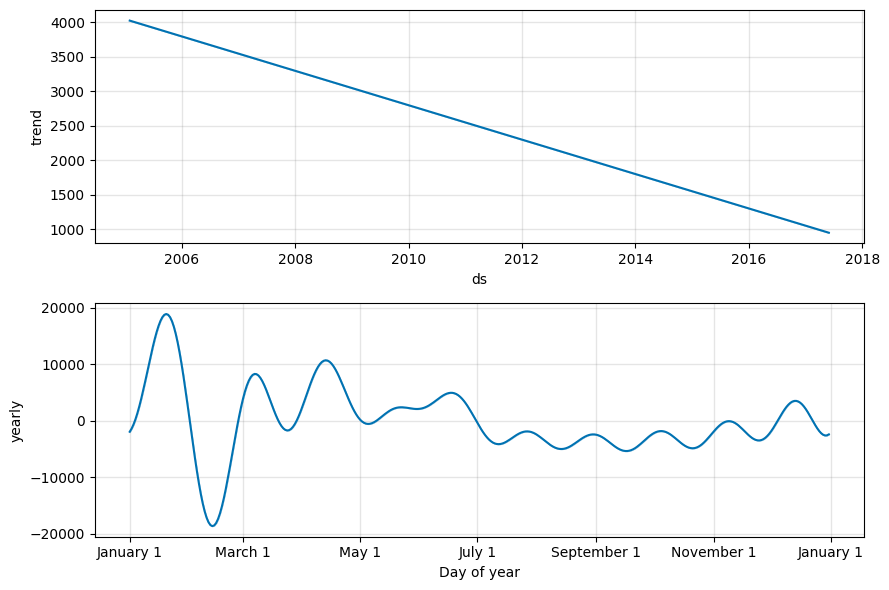

In [54]:
figure=m.plot_components(forecast)